# Exploration of MNIST data set

In [1]:
import os
import torch
import pandas as pd
import numpy as np
from pathlib import Path
from dotenv import find_dotenv, load_dotenv
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

load_dotenv(find_dotenv())

DATA_DIR= os.getenv('DATA_DIR')

train = pd.read_csv(Path(DATA_DIR, "train.csv"), dtype = np.float32)
test = pd.read_csv(Path(DATA_DIR, "test.csv"), dtype = np.float32)


def prepare_dataset(ds, train = True):
    """Simple preparstion of data sets from pandas dataframe.

    Args:
        ds (pd.DataFrame): Dataset
        train (bool, optional): Whether this is a training data set with labels. 
            Defaults to True.

    Returns:
        TensorDataset: Tensor dataset.
    """
    if train:
        y_numpy = ds.label.values
    X_numpy = ds.loc[:,ds.columns != "label"].values
    X_numpy_normalized = X_numpy / 255.
    X = torch.from_numpy(X_numpy_normalized.reshape(-1, 1, 28, 28))
    if train:
        y_train = torch.from_numpy(y_numpy).type(torch.LongTensor)
        return TensorDataset(X, y_train)
    return TensorDataset(X)

def imshow(inp, title=None):
    inp = inp.permute((1,2,0))
    plt.imshow(inp[:,:,0], cmap="plasma")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

/Users/b7064522/opt/miniconda3/envs/drenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 5
SHUFFLE = True
train_dataset = prepare_dataset(train, train=True)
test_dataset = prepare_dataset(test, train=False)
train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = SHUFFLE)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = SHUFFLE)

## Training Examples

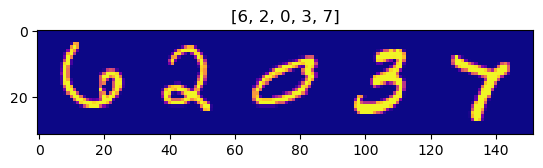

In [3]:
inputs, classes = next(iter(train_dataloader))
out = make_grid(inputs, nrow=5)
imshow(out, title = [int(x.numpy()) for x in classes])

## Test Examples

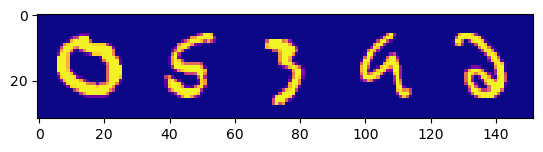

In [4]:
inputs = next(iter(test_dataloader))
out = make_grid(inputs[0], nrow=5)
imshow(out)